In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


### Cross entropy Loss Function will be used.

In [ ]:
def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h),axis=1)).T
          
def cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0) #loss function

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]

In [ ]:
class MVLogisticRegression():

  def __init__(self, thresh=0.5):
    self.thresh = thresh

  def fit(self, X, y, eta=2e-1, epochs=1e3, show_curve = False):
    epochs = int(epochs)
    N,D = X.shape
    K = len(np.unique(y))
    y_values = np.unique(y, return_index=False)
    Y = indices_to_one_hot(y, K).astype(int)

    self.W = np.random.randn(D,K)
    self.B = np.random.randn(N,K)

    J = np.zeros(int(epochs))

    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y, P_hat)

      self.W -= eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y, axis=0)
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")


  def __forward__(self,X):
    return softmax(X@self.W+self.B)

  def predict(self, X):
    return np.argmax(self.__forward__(X), axis=1)
    




In [ ]:
data = pd.read_csv('/content/TripGaussKNN.csv', index_col=0)

In [ ]:
data.head()
y = data['2'].to_numpy()
X = data[['0','1']].to_numpy()

In [ ]:
X

array([[ 2.76939496,  0.76221573],
       [ 1.51927052,  1.48794784],
       [ 2.40708363,  2.83660528],
       ...,
       [-2.09866389,  2.08423019],
       [-1.52330999,  1.08369811],
       [-2.87191052,  0.3439586 ]])

In [ ]:
y.shape

(3000,)

In [ ]:
logreg = MVLogisticRegression()

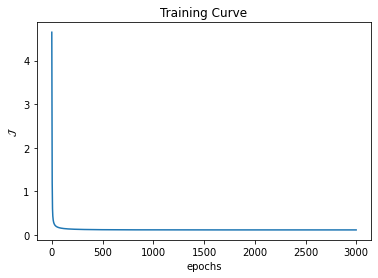

In [ ]:
logreg.fit(X,y,epochs=3e3,  show_curve=True)

In [ ]:
y_hat = logreg.predict(X)

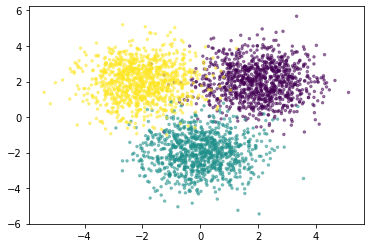

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, alpha=.5, s=6)

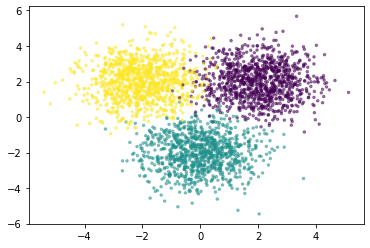

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y_hat, alpha=.5, s=6)

In [ ]:
accuracy(y,y_hat)

## Perceptron of optimum stability also known as logistic regression